In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ride_df = pd.read_csv("ride_data.csv")
city_df = pd.read_csv("city_data.csv")
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Check if any rows are blank
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
#Make sure driver_count column is int type
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# How many data points for each type of city 
city_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
sum(city_df["type"] == "Urban")

66

In [8]:
sum(city_df["type"] == "Suburban")

36

In [9]:
sum(city_df["type"] == "Rural")

18

In [10]:
# See if any rows null using a diff method 
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_df, city_df, how = 'left', on = ['city', 'city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# Create the Urban city dataframe 
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

In [14]:
# Create the Suburban and Rural city dataframe 
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df.head()


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [15]:
# Get number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [16]:
# Create the suburban and rural ride count 
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [17]:
# Get average fare for each city 

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [18]:
# Get average number of drivers for each city 
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

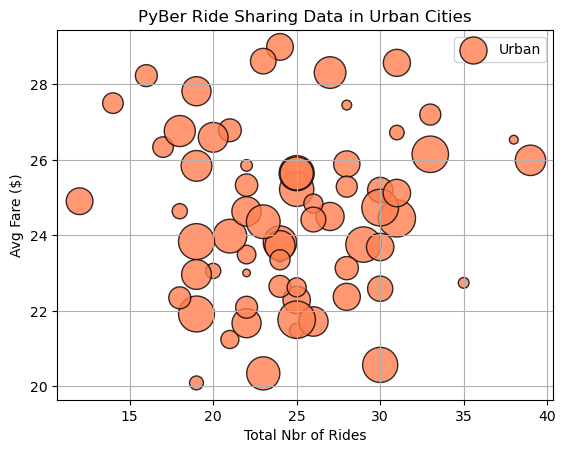

In [19]:
# Build scatter plot for urban cities using matlab method
plt.scatter(
    urban_ride_count, 
    urban_avg_fare, 
    label = "Urban", 
    s = urban_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'coral', 
    linewidths= 1)
plt.title("PyBer Ride Sharing Data in Urban Cities")
plt.xlabel("Total Nbr of Rides")
plt.ylabel("Avg Fare ($)")
plt.legend()
plt.grid()

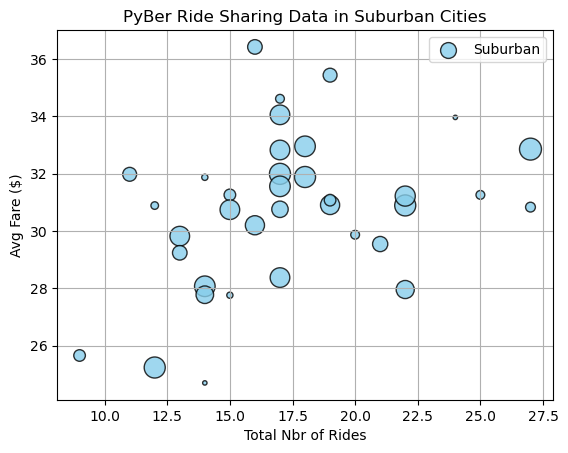

In [20]:
# Build scatter plot for suburban cities using matlab method
plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare, 
    label = "Suburban", 
    s = suburban_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'skyblue', 
    linewidths= 1)
plt.title("PyBer Ride Sharing Data in Suburban Cities")
plt.xlabel("Total Nbr of Rides")
plt.ylabel("Avg Fare ($)")
plt.legend()
plt.grid()

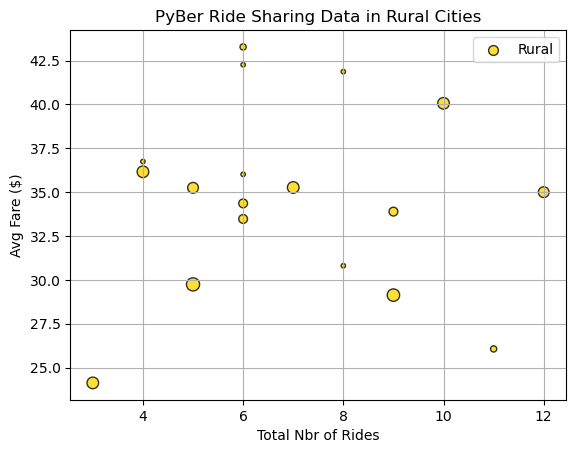

In [21]:
# Build scatter plot for rural cities using matlab method
plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    label = "Rural", 
    s = rural_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'gold', 
    linewidths= 1)
plt.title("PyBer Ride Sharing Data in Rural Cities")
plt.xlabel("Total Nbr of Rides")
plt.ylabel("Avg Fare ($)")
plt.legend()
plt.grid()

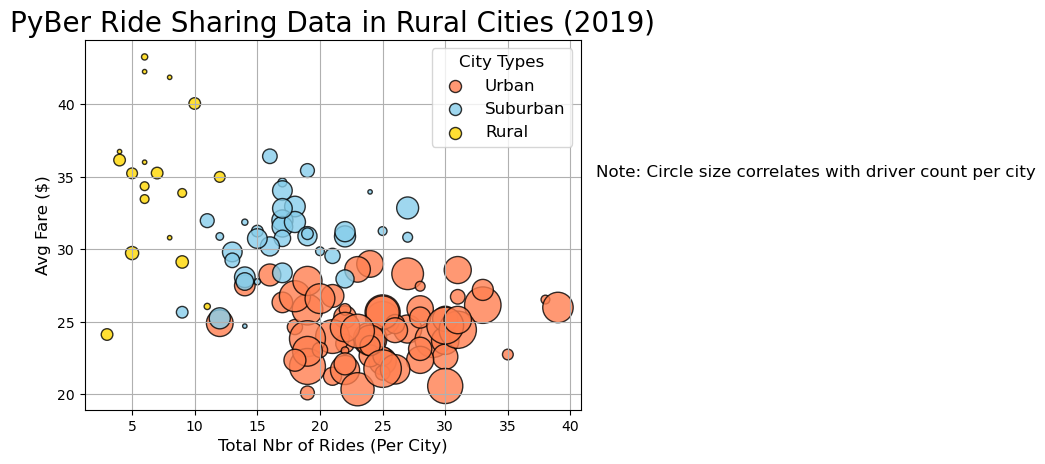

In [22]:
# Combine individual graphs into one 
plt.scatter(
    urban_ride_count, 
    urban_avg_fare, 
    label = "Urban", 
    s = urban_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'coral', 
    linewidths= 1)

plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare, 
    label = "Suburban", 
    s = suburban_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'skyblue', 
    linewidths= 1)

plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    label = "Rural", 
    s = rural_driver_count*10, 
    alpha= 0.8, 
    edgecolors= 'black', 
    color = 'gold', 
    linewidths= 1)

plt.title("PyBer Ride Sharing Data in Rural Cities (2019)", fontsize = 20)
plt.xlabel("Total Nbr of Rides (Per City)", fontsize = 12)
plt.ylabel("Avg Fare ($)", fontsize = 12)
plt.grid()

# Format legend 
lgnd = plt.legend(fontsize = 12, mode = 'Expanded', scatterpoints = 1, loc = 'best', title = 'City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add text label about circle size 
plt.text(42,35, "Note: Circle size correlates with driver count per city", fontsize = 12)

plt.savefig("../Analysis/Fig1.png")

In [23]:
# Summary statistics 
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [24]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [25]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [26]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [27]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [28]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [30]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [31]:
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [32]:
import numpy as np
import scipy.stats as sts

In [37]:
# Calculate measures of central tendencies for the ride count in cities 
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count}')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count}')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}')

The mean for the ride counts for urban trips is 24.62121212121212
The median for the ride counts for urban trips is 24.0
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [38]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode for the ride counts for suburban trips is {mode_suburban_ride_count}')

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [39]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts for rural trips is {mode_rural_ride_count}')

The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [40]:
# Get the fares for the urban cities 
urban_fares = urban_cities_df['fare']
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [43]:
# Calculate the measures of central tendency for the avg fare for the urban cities 
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares}')

median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares}')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is {mode_urban_fares}')

The mean fare price for urban trips is $24.52577230769236
The median fare price for urban trips is $24.64
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5]))


In [44]:
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean fare price for suburban trips is ${mean_suburban_fares}')

median_suburban_fares = np.median(suburban_fares)
print(f'The median fare price for suburban trips is ${median_suburban_fares}')

mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode fare price for suburban trips is {mode_suburban_fares}')

mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare price for rural trips is ${mean_rural_fares}')

median_rural_fares = np.median(rural_fares)
print(f'The median fare price for rural trips is ${median_rural_fares}')

mode_rural_fares = sts.mode(rural_fares)
print(f'The mode fare price for rural trips is {mode_rural_fares}')

The mean fare price for suburban trips is $30.97012800000002
The median fare price for suburban trips is $30.75
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3]))
The mean fare price for rural trips is $34.623440000000016
The median fare price for rural trips is $37.05
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2]))


In [45]:
# Get the driver count data from the urban cities 
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [52]:
mean_drivers_urban = np.mean(urban_drivers)

median_drivers_urban = np.median(urban_drivers)

mode_drivers_urban = sts.mode(urban_drivers)
print(f'The mean number of drivers in urban cities is {mean_drivers_urban}. The median drivers in urban cities is {median_drivers_urban}. The mode drivers in urban cities is {mode_drivers_urban}')

mean_drivers_suburban = np.mean(suburban_drivers)

median_drivers_suburban = np.median(suburban_drivers)

mode_drivers_suburban = sts.mode(suburban_drivers)
print(f'The mean number of drivers in suburban cities is {mean_drivers_suburban}. The median drivers in urban cities is {median_drivers_suburban}. The mode drivers in urban cities is {mode_drivers_suburban}')

The mean number of drivers in urban cities is 36.67815384615385. The median drivers in urban cities is 37.0. The mode drivers in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86]))
The mean number of drivers in suburban cities is 13.712. The median drivers in urban cities is 16.0. The mode drivers in urban cities is ModeResult(mode=array([20], dtype=int64), count=array([79]))


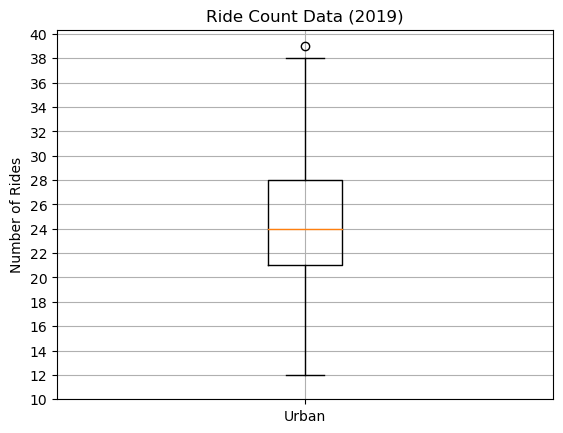

In [53]:
# Create a box-and-whisker plot for the urban cities ride count 
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step = 2))
ax.grid()
plt.show()

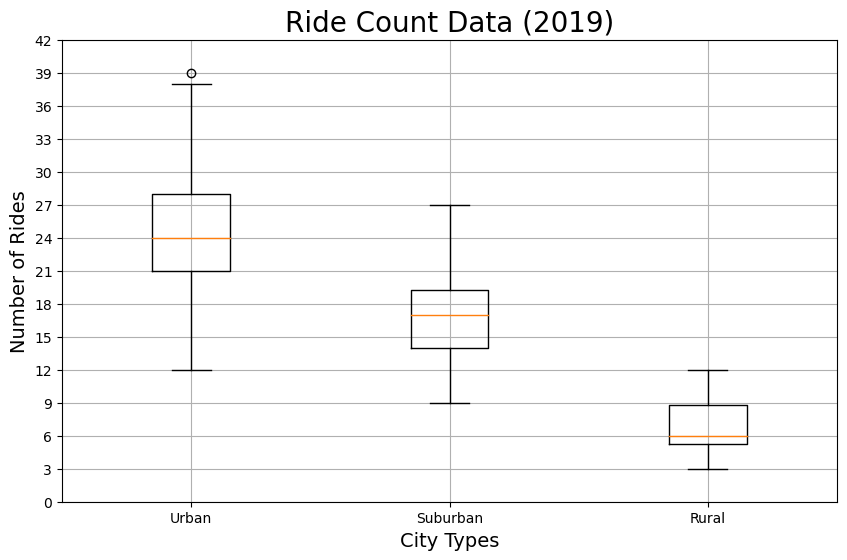

In [55]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("../Analysis/Fig2.png")
plt.show()

In [56]:
# Get the city that matches 39 
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f'{urban_city_outlier} has the highest rider count')

West Angela has the highest rider count


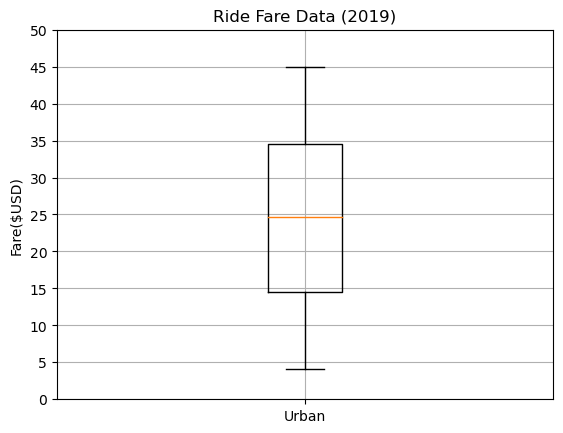

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [57]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

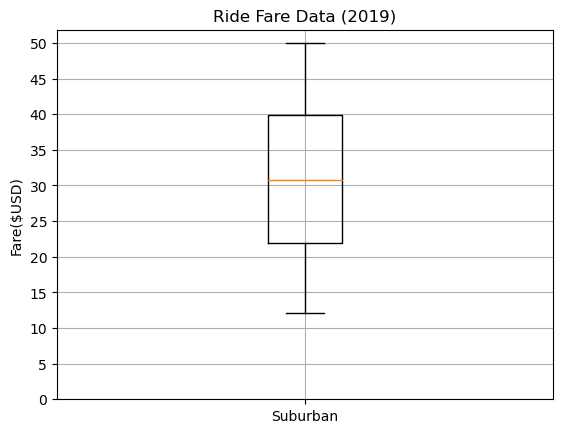

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [58]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

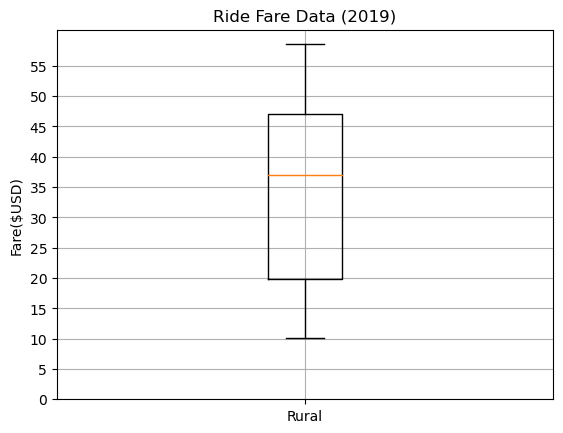

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [61]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

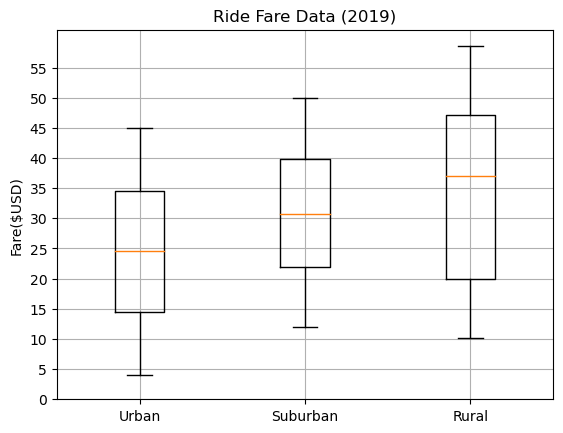

In [69]:
# Create a box-and-whisker plot for the all 3 city types
fares_combined = [urban_fares, suburban_fares, rural_fares]
x_labels_fares = ['Urban', 'Suburban', 'Rural']

fig, ax = plt.subplots()
ax.boxplot(fares_combined, labels= x_labels_fares)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show()